In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set the notebook parameters, the path to the key file and change working-directory to the root directory of the dataprocessing framework.

In [2]:
import os
base_dir = '/local/scratch/toolkit/'
os.environ['EXOT_ACCESS_DIR'] = str(base_dir + "benchmark_platforms_access/")
os.chdir(base_dir + 'datapro')
print("Working directory: " + str(os.getcwd()))
print("Key directory set to: " + str(os.environ['EXOT_ACCESS_DIR']))

Working directory: /local/scratch/toolkit/datapro
Key directory set to: /local/scratch/toolkit/benchmark_platforms_access/


Import all necessary packages.

In [3]:
np.set_printoptions(linewidth=120)
plt.rcParams["figure.figsize"] = (18,10)
plt.rcParams["legend.loc"] = "lower right"

import toml    as TOML              # TOML library to handle config files
import pandas  as pd                # Pandas for data manipulation
import seaborn as sb                # Statistical data visualisation
import pathlib as PATH              # Used to convert strings to path objects for (de-)serialisation
import types   as tp                # Library used for online method development

# scikit-learn packets
import sklearn.base                 #
import sklearn.svm                  # LinearSVC, SVC
import sklearn.pipeline             # make_pipeline
import sklearn.preprocessing        # StandardScaler
import sklearn.decomposition        # PCA
import sklearn.naive_bayes          # GaussianNB
import sklearn.metrics              # CM

# Toolkit packets
import exot                       # Dataprocessing
import exot.experiment            # Experiment for execution
import exot.util                  # General utilities
import exot.layer                 # Data manipulation layers
from exot.util       import *
from exot.layer      import *
from exot.channel    import *
from exot.experiment import *

# Plotting
from exot.plotting.experiment_plotter import *
from exot.plotting.run_plotter        import *

Parameters

In [4]:
NB_EXPERIMENT_TYPES = ["performance", "interference"]

__Notebook config__

In [5]:
# Names to configure
NB_EXPERIMENT_TYPE = "interference"
NB_CONFIG = "thermal"

# Generated names
NB_EXPERIMENT = f"{NB_CONFIG}-cc_{NB_EXPERIMENT_TYPE}_amend"
NB_CHANNEL = "f" + NB_CONFIG.split("+")[-1][0]

In [6]:
print("NB_EXPERIMENT_TYPE ", NB_EXPERIMENT_TYPE)
print("NB_CONFIG          ", NB_CONFIG)
print("NB_EXPERIMENT      ", NB_EXPERIMENT)

NB_EXPERIMENT_TYPE  interference
NB_CONFIG           thermal
NB_EXPERIMENT       thermal-cc_interference_amend


In [7]:
assert NB_EXPERIMENT_TYPE in NB_EXPERIMENT_TYPES

# Generate Experiment
1. Load the configuration and define phases and environments

In [8]:
config = TOML.load(f"configurations/{NB_EXPERIMENT}.toml")
print(TOML.dumps(config))

environments_to_execute = [
    "Haswell"
]

phases = {
    "Haswell": {
        "short": ["trainShortHaswell", "evalShortHaswell"],
        "normal": ["trainHaswell", "evalHaswell"],
    },
}

name = "thermal-cc_interference_amend"
save_path = "./data"
backup_path = "./data/_backup"
experiment_exists_action = "move"

[EXPERIMENT]
type = "PerformanceExperiment"
channel = "Thermal"

[EXPERIMENT.GENERAL]
latency = 10
fan = true
governors = "userspace"
frequencies = "max"
sampling_period = 0.001
delay_after_spawn = 30.0
delay_after_auxiliary = 1.0
active_wait = false

[EXPERIMENT.PHASES.trainHaswell]
bit_count = 1500
symbol_rates = [ 1, 2, 3, 4,]
repetitions = 3

[EXPERIMENT.PHASES.evalHaswell]
bit_count = 5000
symbol_rates = [ 1, 2, 3, 4,]
repetitions = 3

[EXPERIMENT.LAYERS.src]
name = "SourcePassthrough"

[EXPERIMENT.LAYERS.lne]
name = "ManchesterLineCoding"

[EXPERIMENT.LAYERS.rdp]
name = "CoreActivation"

[EXPERIMENT.LAYERS.io]
name = "TimeValue"

[EXPERIMENT.LAYERS.src.params]

[EXPERIMENT.LAYERS.lne.params]

[EXPERIMENT.LAYERS.rdp.params]

[EXPERIMENT.LAYERS.io.params]
timebase = "ns"

[ENVIRONMENTS.Haswell.APPS.snk]
executable = "meter_thermal_msr"
zone = "host"

[ENVIRO

2. Instantiate, generate and write the experiment

In [11]:
raise Exception("Are you sure?")

Exception: Are you sure?

In [12]:
channel = ChannelFactory()(config["EXPERIMENT"]["channel"])
experiment = ExperimentFactory()(config["EXPERIMENT"]["type"], config=config, channel=channel)

experiment.generate()
experiment.print_duration()

# If exists...
if PATH.Path(f"data/{NB_EXPERIMENT}/").exists():
    # First move...
    experiment.config.experiment_exists_action = "move"
    experiment.write()

# Then set to update mode.
experiment.config.experiment_exists_action = "update"
experiment.write()

2019-09-11 11:16:06 :: bootstrapped layer 'src' with SourcePassthrough
2019-09-11 11:16:06 :: bootstrapped layer 'lne' with ManchesterLineCoding
2019-09-11 11:16:06 :: bootstrapped layer 'rdp' with CoreActivation
2019-09-11 11:16:06 :: bootstrapped layer 'io' with TimeValue
2019-09-11 11:16:07 :: Estimated duration of a single repetition of the trainHaswell phase is 0:54:19
2019-09-11 11:16:07 :: Estimated duration of a single repetition of the evalHaswell phase is 2:55:50.666667
2019-09-11 11:16:07 :: This results in a total estimated duration of 11:30:29 for all repetitions.


## Execute

Running `execute` will execute in all environments present in the configuration.

Show phases' durations.

In [11]:
experiment.print_duration()

2019-09-11 16:20:42 :: Estimated duration of a single repetition of the trainHaswell phase is 0:54:19
2019-09-11 16:20:42 :: Estimated duration of a single repetition of the evalHaswell phase is 2:55:50.666667
2019-09-11 16:20:42 :: This results in a total estimated duration of 11:30:29 for all repetitions.


_Optionally_ peek at execution status. The execution status can be modified manually or via `_modify_execution_status`. If a modification has been made, push it to run instances with `_push_execution_status`. To rerun or resume execution, set the _resume_ argument to `True`.

In [ ]:
execution_status = experiment._execution_status

for _platform in phases:
    for phase, runs in execution_status.items():
        for run, statuses in runs.items():
            for platform, status in statuses:
                if _platform == platform and _platform in phase:
                    print(
                        "{}Phase: {:>20s} Run: {:3d} Platform: {:>8s} Status: {}".format(
                            "✓ " if any(status) else "✗ ", phase, run, platform, status
                        )
                    )

Finally, execute sequentially in all environments.

In [ ]:
raise Exception("Are you sure?")

In [13]:
for env in environments_to_execute:
#     experiment.execute_in_environment(env, phases[env]['short'], resume=False)
    experiment.execute_in_environment(env, phases[env]['normal'], resume=False)
experiment.write()

2019-09-11 16:20:55 :: Haswell->host: connected: SSHUnixDriver
2019-09-11 16:20:55 :: Haswell->host: sending experiment
2019-09-11 16:20:56 :: Haswell->host: experiment sent!
2019-09-11 16:20:56 :: executing phases: ['trainHaswell', 'evalHaswell'] in env 'Haswell'
2019-09-11 16:20:56 :: Haswell->host: configuring to {'latency': 10, 'fan': True, 'governors': 'userspace', 'frequencies': 'max', 'sampling_period': 0.001, 'delay_after_spawn': 30.0, 'delay_after_auxiliary': 1.0, 'active_wait': False}
2019-09-11 16:20:59 :: executing in env: 'Haswell', resume: False, reps: [0, 1, 2], run: <Run at 0x7f248d816e10 (digested, config={'phase': 'trainHaswell', 'bit_count': 1500, 'symbol_rate': 1, 'symbol_rate_id': 0, 'repetitions': 3})>
2019-09-11 16:20:59 :: executing in env: Haswell, rep: 0, estimated duration: 1500.0s, run: <Run at 0x7f248d816e10 (digested, config={'phase': 'trainHaswell', 'bit_count': 1500, 'symbol_rate': 1, 'symbol_rate_id': 0, 'repetitions': 3})>
2019-09-11 16:59:03 :: execut

2019-09-12 08:26:45 :: executing in env: Haswell, rep: 1, estimated duration: 1250.0s, run: <Run at 0x7f248ff75cf8 (digested, config={'phase': 'evalHaswell', 'bit_count': 5000, 'symbol_rate': 4, 'symbol_rate_id': 3, 'repetitions': 3})>
2019-09-12 08:58:33 :: executing in env: Haswell, rep: 2, estimated duration: 1250.0s, run: <Run at 0x7f248ff75cf8 (digested, config={'phase': 'evalHaswell', 'bit_count': 5000, 'symbol_rate': 4, 'symbol_rate_id': 3, 'repetitions': 3})>
2019-09-12 09:30:23 :: Haswell->host: experiment logs fetched!
2019-09-12 09:30:23 :: Haswell->host: cleaning up
2019-09-12 09:30:37 :: Haswell->host: successfully deleted remote data directory
2019-09-12 09:30:37 :: Haswell->host: disconnected


## Analyse

1. Define which class of experiments to analyse (short of normal length)

In [14]:
SHORT = False

2. Check data collection status

In [15]:
for _experiment in [NB_EXPERIMENT]:
    for _platform, _phase_mapping in phases.items():
        for _class, _phases in _phase_mapping.items():
            for _phase in _phases:
                _log_folders = !ls -d data/$_experiment/$_phase*/$_platform 2>/dev/null | wc -l
                _logs = !ls -d data/$_experiment/$_phase*/$_platform/**.csv 2>/dev/null | wc -l
                print("experiment:", _experiment, "platform:", _platform, "phase:", _phase,
                      "folders:", _log_folders[0].strip(), "logs:", _logs[0].strip(), sep=" ")

experiment: thermal-cc_interference_amend platform: Haswell phase: trainShortHaswell folders: 0 logs: 0
experiment: thermal-cc_interference_amend platform: Haswell phase: evalShortHaswell folders: 0 logs: 0
experiment: thermal-cc_interference_amend platform: Haswell phase: trainHaswell folders: 4 logs: 24
experiment: thermal-cc_interference_amend platform: Haswell phase: evalHaswell folders: 4 logs: 24


3. Deserialisation

In [10]:
path_to_serialised_experiment = PATH.Path(f"data/{NB_EXPERIMENT}/_experiment.pickle")
experiment = PerformanceExperiment.read(path_to_serialised_experiment, replace=False)

2019-09-11 16:20:33 :: unpicked an experiment instance <PerformanceExperiment at 0x7f2490016cc0 with Thermal channel, configured>
2019-09-11 16:20:33 :: configs from pickle and directory differ at [{'path': ('save_path',), 'left': 'data', 'right': './data'}]
2019-09-11 16:20:33 :: git commit of unpickled experiment repo 'adc1be85' does not match the commit in which the unpickling was performed '7cad5467'


4. Specify the demo run and visualise

In [16]:
DEMO_PHASE = "trainHaswell"
DEMO_ID = 0
DEMO_ARM = "ARM" in DEMO_PHASE

In [17]:
ingest_args = dict(
    lne={
        "decision_device": sklearn.pipeline.make_pipeline(
            sklearn.preprocessing.StandardScaler(), sklearn.svm.LinearSVC()
        )
    },
    io=(
        {
            "env": "ARMv8",
            "rep": 0,
            "matcher": exot.util.wrangle.Matcher("thermal", "sysfs", ["zone"], [0]),
        }
        if DEMO_ARM
        else {
            "env": "Haswell",
            "rep": 0,
            "matcher": exot.util.wrangle.Matcher("thermal", "msr", ["core"], [0, 2, 4, 6]),
            "combine": "max",
        }
    ),
)

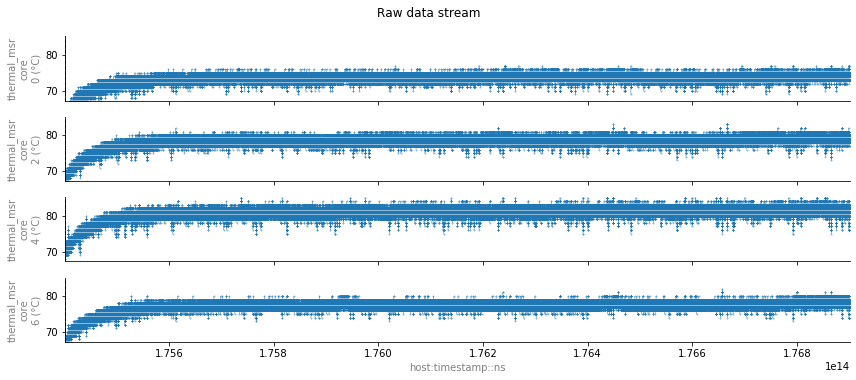

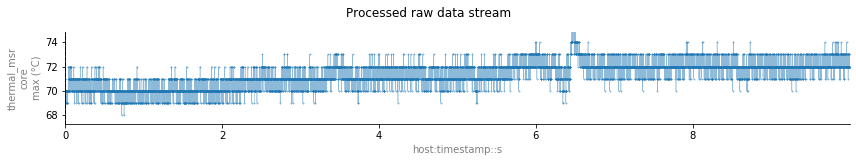

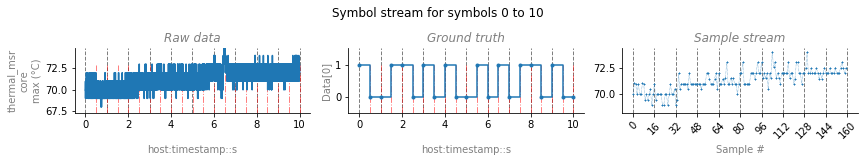

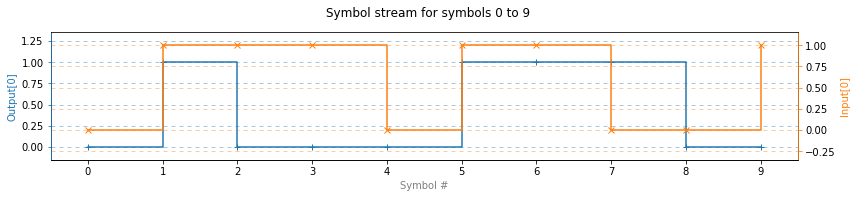

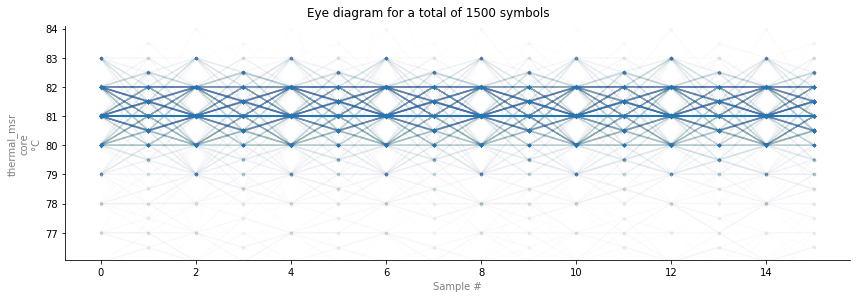

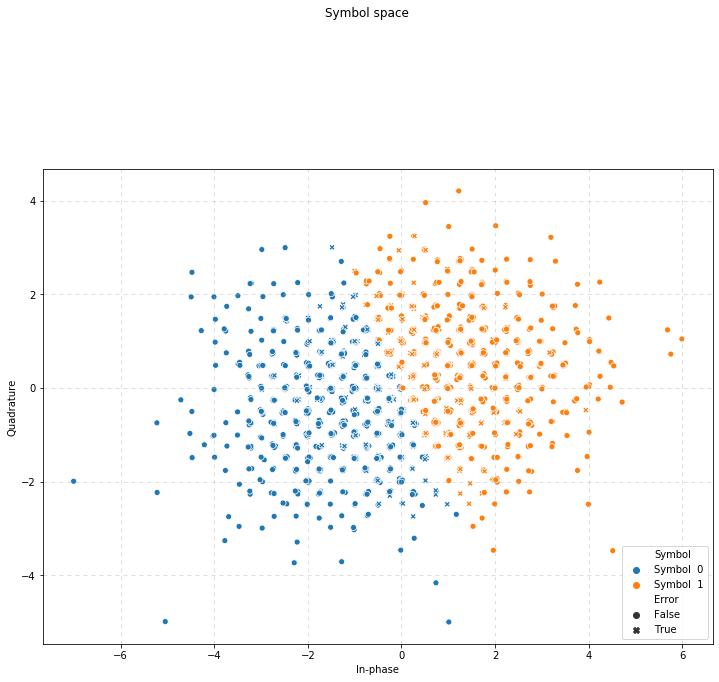

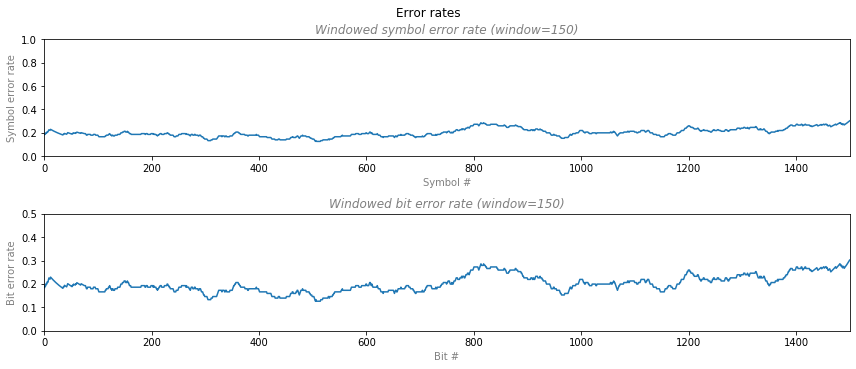

In [18]:
demo_run = experiment.phases[DEMO_PHASE][DEMO_ID]
demo_run.ingest(**ingest_args)

with PerformanceRunPlotter(demo_run) as plotter:
    plotter.plot_rawstream()
    plotter.plot_rdpstream(end=10)
    plotter.plot_slicing()
    plotter.plot_symstream()
    plotter.plot_eye_diagram()
    plotter.plot_symbol_space()
    plotter.plot_error()

5. Analyse the experiment

_Define the analysis arguments and phase mappings_

In [20]:
to_evaluate = "short" if SHORT else "normal"

analysis_args = {
    "ARMv8": dict(
        lne={
            "decision_device": sklearn.pipeline.make_pipeline(
                sklearn.preprocessing.StandardScaler(), sklearn.svm.LinearSVC()
            )
        },
        io={"matcher": exot.util.wrangle.Matcher("thermal", "sysfs", ["zone"], [0])},
    ),
    "Haswell": dict(
        lne={
            "decision_device": sklearn.pipeline.make_pipeline(
                sklearn.preprocessing.StandardScaler(), sklearn.svm.LinearSVC()
            )
        },
        io={
            "matcher": exot.util.wrangle.Matcher("thermal", "msr", ["core"], [0, 2, 4, 6]),
            "combine": "max",
        },
    ),
}

phase_mappings = {
    "Haswell": {
        "short": ["trainShortHaswell", "evalShortHaswell"],
        "normal": ["trainHaswell", "evalHaswell"],
    },
}

6. Calculate the performance metrics

In [21]:
for env in phase_mappings:
    experiment.calculate_performance_metrics(
        phase_mapping=dict([tuple(phase_mappings[env][to_evaluate])]),
        envs=[env],
        reps=[],
        **analysis_args[env],
    )

2019-09-12 09:32:48 :: analysing performance for phases: trainHaswell -> evalHaswell
2019-09-12 09:32:48 :: \_ analysing performance for env: Haswell
2019-09-12 09:33:11 :: \_ analysing performance for env: Haswell
2019-09-12 09:33:22 :: \_ analysing performance for env: Haswell
2019-09-12 09:33:30 :: \_ analysing performance for env: Haswell


_Show the performance metrics..._

In [22]:
experiment.performance_metrics.head()

,phase,trained_with,environment,bit_rate,symbol_rate,repetition,bit_error,symbol_error,matcher,variable
0,trainHaswell,,Haswell,1.0,1,0,0.202667,0.202667,"<Matcher quantity='thermal', method='msr', val...",thermal_msr
1,evalHaswell,trainHaswell,Haswell,1.0,1,0,0.079800,0.079800,"<Matcher quantity='thermal', method='msr', val...",thermal_msr
2,trainHaswell,,Haswell,1.0,1,1,0.078667,0.078667,"<Matcher quantity='thermal', method='msr', val...",thermal_msr
3,evalHaswell,trainHaswell,Haswell,1.0,1,1,0.083600,0.083600,"<Matcher quantity='thermal', method='msr', val...",thermal_msr
4,trainHaswell,,Haswell,1.0,1,2,0.200667,0.200667,"<Matcher quantity='thermal', method='msr', val...",thermal_msr


_...and the aggregated performance metrics (mean of repetitions)_

In [23]:
experiment.aggregate_performance_metrics()

,phase,trained_with,environment,bit_rate,symbol_rate,matcher,variable,bit_error,symbol_error
0,evalHaswell,trainHaswell,Haswell,1.0,1,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.082067,0.082067
1,evalHaswell,trainHaswell,Haswell,2.0,2,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.087533,0.087533
2,evalHaswell,trainHaswell,Haswell,3.0,3,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.115133,0.115133
3,evalHaswell,trainHaswell,Haswell,4.0,4,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.119867,0.119867
4,trainHaswell,,Haswell,1.0,1,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.160667,0.160667
5,trainHaswell,,Haswell,2.0,2,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.102222,0.102222
6,trainHaswell,,Haswell,3.0,3,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.103778,0.103778
7,trainHaswell,,Haswell,4.0,4,"<Matcher quantity='thermal', method='msr', val...",thermal_msr,0.132889,0.132889


7. Serialise the experiment with the calculated performance metrics

In [26]:
experiment.write()

8. Get aggregated performance metrics for each environment and phase and output as CSV

In [25]:
for env in phase_mappings:
    eval_phase = phase_mappings[env][to_evaluate][-1]
    BERs = wrangle.filter_data(
        experiment.aggregate_performance_metrics(), environment=env, phase=eval_phase
    )

    PREFIX = "TH" + ("_INT_" if NB_EXPERIMENT_TYPE == "interference" else "")

    pd.DataFrame({"bit_rate": BERs["bit_rate"], "bit_error": BERs["bit_error"]}).to_csv(
        "./data/BER_{}_{}_{}_amend.dat".format(PREFIX, eval_phase, env),
        sep=",",
        encoding="utf-8",
        index=False,
    )

9. Plot performance metrics

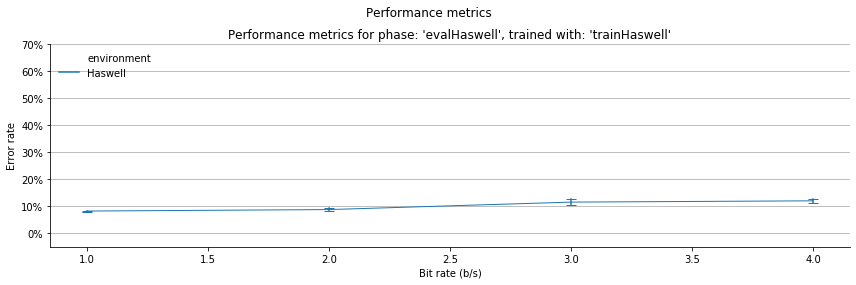

In [24]:
with PerformanceExperimentPlotter(experiment) as plotter:
    plotter.plot_performance_metrics()